# Native Space Comparison
C. Heiser, 2019

---
__The purpose of this notebook is to evaluate priming dimensionality reduction techniques with PCA versus using 500-gene space for their ability to preserve Euclidean structure of high-dimensional datasets.__  
  
To benchmark these techniques, we are using two single-cell RNAseq datasets:
* From [__Macosko, *et al* (2015)__](https://www.ncbi.nlm.nih.gov/pubmed/26000488), the mouse retina scRNA-seq data generated using DropSeq: [GSM1626793](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM1626793)
* From [__Herring, *et al* (2018)__](https://www.ncbi.nlm.nih.gov/pubmed/29153838), the WT mouse colon scRNA-seq data generated using inDrops: [GSM2743164](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM2743164)  
  
The first set should be __discrete__, containing highly separable cell populations from the mouse retina, where the latter will be __continuous__, representing a continuum of branching cell states in the gut epithelium.  
  
Both datasets have been __preprocessed and feature-selected__ to allow for direct input to downstream dimensionality reduction algorithms (rather than first performing PCA to limit dimensional input). These methods are shown in [`dev/QC.ipynb`](dev/QC.ipynb).

In [1]:
import sys
sys.path.append('../')
from fcc_utils import *
%matplotlib inline

In [ ]:
# reload functions when editing file
del sys.modules['fcc_utils']
from fcc_utils import *

---
First, read in retina and colon datasets with all genes present

In [2]:
# read in Macosko retina data
retina = sc.read_text('../inputs/GSM1626793_P14Retina_1.digital_expression_filtered_CH.tsv.gz', delimiter='\t')
# read in Herring colon data
colon = sc.read_text('../inputs/GSM2743164_rep1_colon_rnaseq_filtered_CH.tsv.gz', delimiter='\t', first_column_names=True)

In [3]:
# look at dimensions of counts matrix (cells, genes)
retina

AnnData object with n_obs × n_vars = 1326 × 20478 

In [4]:
# get useful metrics of counts data
retina.var['mito'] = retina.var_names.str.contains('MT:')
sc.pp.calculate_qc_metrics(retina, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
retina.layers['raw_counts'] = retina.X.copy() # save raw counts in layer
sc.pp.normalize_total(retina, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(retina, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
retina

AnnData object with n_obs × n_vars = 1326 × 20478 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

In [5]:
# look at dimensions of counts matrix (cells, genes)
colon

AnnData object with n_obs × n_vars = 1117 × 25505 

In [6]:
# get useful metrics of counts data
colon.var['mito'] = colon.var_names.str.contains('mt-')
sc.pp.calculate_qc_metrics(colon, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
colon.layers['raw_counts'] = colon.X.copy() # save raw counts in layer
sc.pp.normalize_total(colon, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(colon, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
colon

AnnData object with n_obs × n_vars = 1117 × 25505 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

---
Next, read in feature-selected retina and colon datasets with 500 most variable genes

In [7]:
# read in Macosko retina data (feature-selected to 500 VGs)
retina_sel = sc.read_text('../inputs/GSM1626793_P14Retina_1.processed.tsv', delimiter='\t')
# read in Herring colon data (feature-selected to 500 VGs)
colon_sel = sc.read_text('../inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv', delimiter='\t', first_column_names=True)

In [8]:
# look at dimensions of counts matrix (cells, genes)
retina_sel

AnnData object with n_obs × n_vars = 1326 × 500 

In [9]:
# get useful metrics of counts data
retina_sel.var['mito'] = retina_sel.var_names.str.contains('MT:')
sc.pp.calculate_qc_metrics(retina_sel, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
retina_sel.layers['raw_counts'] = retina_sel.X.copy() # save raw counts in layer
sc.pp.normalize_total(retina_sel, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(retina_sel, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
retina_sel

AnnData object with n_obs × n_vars = 1326 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

In [10]:
# look at dimensions of counts matrix (cells, genes)
colon_sel

AnnData object with n_obs × n_vars = 1117 × 500 

In [11]:
# get useful metrics of counts data
colon_sel.var['mito'] = colon_sel.var_names.str.contains('mt-')
sc.pp.calculate_qc_metrics(colon_sel, qc_vars=['mito'], inplace=True)

# preprocess AnnData for downstream dimensionality reduction
colon_sel.layers['raw_counts'] = colon_sel.X.copy() # save raw counts in layer
sc.pp.normalize_total(colon_sel, target_sum=1, layers=None, key_added='norm_factor') # normalize within each cell to get fractional counts
arcsinh(colon_sel, scale=1000) # arcsinh-transform normalized counts and add to .layers['arcsinh_norm']

# see resulting AnnData contents
colon_sel

AnnData object with n_obs × n_vars = 1117 × 500 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'norm_factor'
    var: 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    layers: 'raw_counts', 'arcsinh_norm'

---
## PCA
Because PCA performs a __linear__ transformation on the data, 500 PCs may offer a better approximation of the 'native' space the cells reside in.  
We will compare this to the 500 selected genes in `retina_sel` and `colon_sel`.

In [12]:
retina.X = retina.layers['arcsinh_norm'].copy()
sc.tl.pca(retina, use_highly_variable=False, n_comps=500)

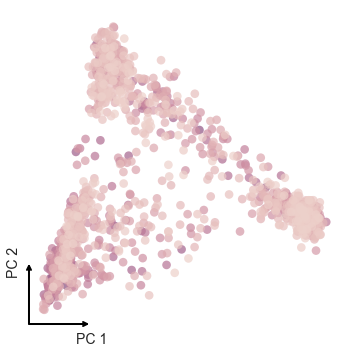

In [13]:
plot_DR(retina.obsm['X_pca'], color=retina.obs['log1p_total_counts'], dim_name='PC')

Now perform same analysis on colon dataset

In [14]:
colon.X = colon.layers['arcsinh_norm'].copy()
sc.tl.pca(colon, use_highly_variable=False, n_comps=500)

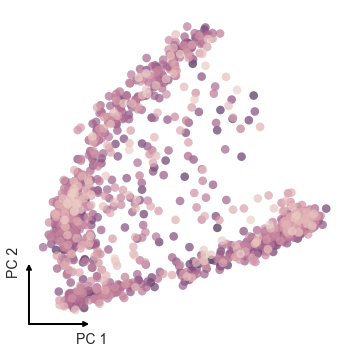

In [15]:
plot_DR(colon.obsm['X_pca'], color=colon.obs['log1p_total_counts'], dim_name='PC')

---
## t-SNE
A workhorse technique for dimensionality reduction and visualization of scRNA-seq datasets, t-SNE performs a stochastic, non-linear transformation to project high-dimensional data into 2D in order to identify clustering and global structure.  
Here, we will plug arcsinh-normalized counts data directly into t-SNE and compare results to the original, feature-selected dataset.

In [16]:
retina_sel.X = retina_sel.layers['arcsinh_norm'].copy()
sc.tl.tsne(retina_sel, use_rep='X', perplexity=30, random_state=18)

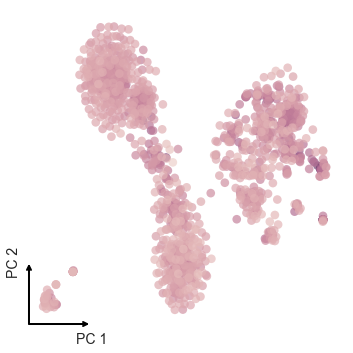

In [17]:
plot_DR(retina_sel.obsm['X_tsne'], color=retina_sel.obs['log1p_total_counts'], dim_name='PC')

In [18]:
sc.tl.tsne(retina, use_rep='X_pca', n_pcs=500, perplexity=30, random_state=18)

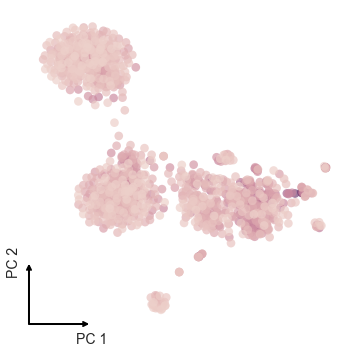

In [19]:
plot_DR(retina.obsm['X_tsne'], color=retina.obs['log1p_total_counts'], dim_name='PC')

Now perform same analysis on colon dataset

In [20]:
colon_sel.X = colon_sel.layers['arcsinh_norm'].copy()
sc.tl.tsne(colon_sel, use_rep='X', perplexity=30, random_state=18)

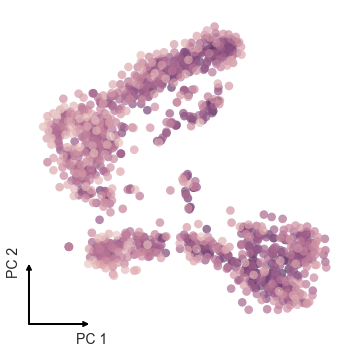

In [21]:
plot_DR(colon_sel.obsm['X_tsne'], color=colon_sel.obs['log1p_total_counts'], dim_name='PC')

In [22]:
sc.tl.tsne(colon, use_rep='X_pca', n_pcs=500, perplexity=30, random_state=18)

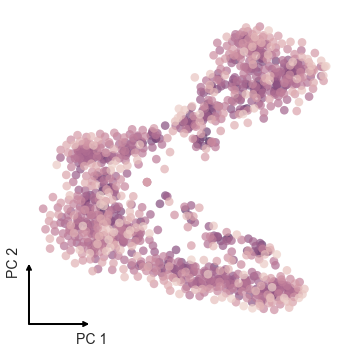

In [23]:
plot_DR(colon.obsm['X_tsne'], color=colon.obs['log1p_total_counts'], dim_name='PC')

---
## UMAP
Another popular method for low-dimensional projection of scRNA-seq datasets, UMAP creates high-dimensional manifolds that describe the structure of the dataset.  
Here, we will plug arcsinh-normalized counts data directly into UMAP and compare results to the original, feature-selected dataset.

In [24]:
sc.pp.neighbors(retina_sel, n_neighbors=30, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(retina_sel, random_state=18)

/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../.virtualenvs/lau_lab/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/Users/cody/.virtualenvs/lau_lab/lib/python3.7/site-packages/numba/compile

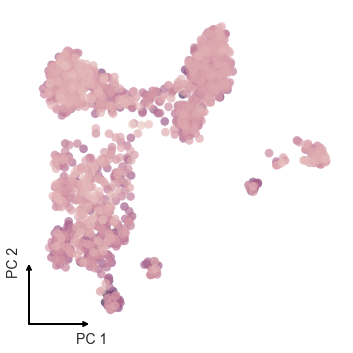

In [25]:
plot_DR(retina_sel.obsm['X_umap'], color=retina_sel.obs['log1p_total_counts'], dim_name='PC')

In [26]:
sc.pp.neighbors(retina, n_neighbors=30, use_rep='X_pca', n_pcs=500, knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(retina, random_state=18)

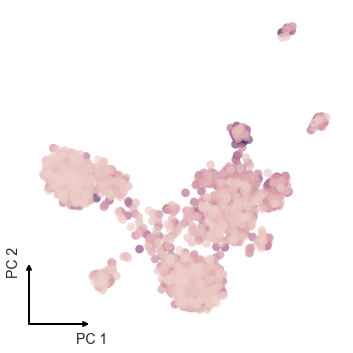

In [27]:
plot_DR(retina.obsm['X_umap'], color=retina.obs['log1p_total_counts'], dim_name='PC')

Now perform same analysis on colon dataset

In [28]:
sc.pp.neighbors(colon_sel, n_neighbors=30, use_rep='X', knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(colon_sel, random_state=18)

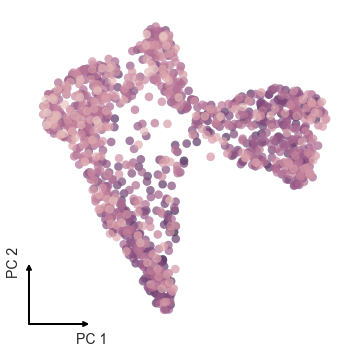

In [29]:
plot_DR(colon_sel.obsm['X_umap'], color=colon_sel.obs['log1p_total_counts'], dim_name='PC')

In [30]:
sc.pp.neighbors(colon, n_neighbors=30, use_rep='X_pca', n_pcs=500, knn=True, random_state=18, metric='euclidean', copy=False)
sc.tl.umap(colon, random_state=18)

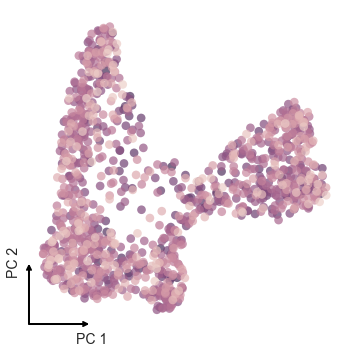

In [31]:
plot_DR(colon.obsm['X_umap'], color=colon.obs['log1p_total_counts'], dim_name='PC')

---
We can test the Euclidean distance preservation as follows:

In [32]:
# choose value for K-nearest neighbor calculations. We use 30 because that is the standard perplexity chosen for DR techniques here.
k = 30

In [33]:
# create dictionaries for dumping results into
final_distance_stats = {'Retina':{'R':{}, 'EMD':{}, 'Knn Pres.':{}}, 'Colon':{'R':{}, 'EMD':{}, 'Knn Pres.':{}}}

Calculate cell-cell distances:

In [34]:
%%time
# save distance matrices in AnnData object for easy access
retina.uns['tsne_distance'] = pdist(retina.obsm['X_tsne'])
retina.uns['umap_distance'] = pdist(retina.obsm['X_umap'])
retina.uns['native_distance'] = pdist(retina.obsm['X_pca']) # native distance here is 500 PCs 

CPU times: user 410 ms, sys: 5.6 ms, total: 416 ms
Wall time: 415 ms


In [35]:
%%time
# save distance matrices in AnnData object for easy access
retina_sel.uns['tsne_distance'] = pdist(retina_sel.obsm['X_tsne'])
retina_sel.uns['umap_distance'] = pdist(retina_sel.obsm['X_umap'])
retina_sel.uns['native_distance'] = pdist(retina_sel.X) # native distance here is 500 genes, normalized and arcsinh-transformed

CPU times: user 406 ms, sys: 3.76 ms, total: 410 ms
Wall time: 410 ms


In [36]:
%%time
# save distance matrices in AnnData object for easy access
colon.uns['tsne_distance'] = pdist(colon.obsm['X_tsne'])
colon.uns['umap_distance'] = pdist(colon.obsm['X_umap'])
colon.uns['native_distance'] = pdist(colon.obsm['X_pca']) # native distance here is 500 PCs 

CPU times: user 289 ms, sys: 4.13 ms, total: 294 ms
Wall time: 293 ms


In [37]:
%%time
# save distance matrices in AnnData object for easy access
colon_sel.uns['tsne_distance'] = pdist(colon_sel.obsm['X_tsne'])
colon_sel.uns['umap_distance'] = pdist(colon_sel.obsm['X_umap'])
colon_sel.uns['native_distance'] = pdist(colon_sel.X) # native distance here is 500 genes, normalized and arcsinh-transformed

CPU times: user 289 ms, sys: 2.16 ms, total: 291 ms
Wall time: 290 ms


Calculate k-nearest neighbor graphs:

In [38]:
from scipy.spatial import distance_matrix as dm

In [39]:
%%time
# calculate simple binary knn graphs for each distance matrix above
knn_graph(dm(retina.obsm['X_tsne'],retina.obsm['X_tsne']), k, retina, save_rep='tsne_knn')
knn_graph(dm(retina.obsm['X_umap'],retina.obsm['X_umap']), k, retina, save_rep='umap_knn')
knn_graph(dm(retina.obsm['X_pca'],retina.obsm['X_pca']), k, retina, save_rep='native_knn')

CPU times: user 4.43 s, sys: 634 ms, total: 5.06 s
Wall time: 5.07 s


In [40]:
%%time
# calculate simple binary knn graphs for each distance matrix above
knn_graph(dm(retina_sel.obsm['X_tsne'],retina_sel.obsm['X_tsne']), k, retina_sel, save_rep='tsne_knn')
knn_graph(dm(retina_sel.obsm['X_umap'],retina_sel.obsm['X_umap']), k, retina_sel, save_rep='umap_knn')
knn_graph(dm(retina_sel.X,retina_sel.X), k, retina_sel, save_rep='native_knn')

CPU times: user 4.29 s, sys: 523 ms, total: 4.82 s
Wall time: 4.82 s


In [41]:
%%time
# calculate simple binary knn graphs for each distance matrix above
knn_graph(dm(colon.obsm['X_tsne'],colon.obsm['X_tsne']), k, colon, save_rep='tsne_knn')
knn_graph(dm(colon.obsm['X_umap'],colon.obsm['X_umap']), k, colon, save_rep='umap_knn')
knn_graph(dm(colon.obsm['X_pca'],colon.obsm['X_pca']), k, colon, save_rep='native_knn')

CPU times: user 2.74 s, sys: 375 ms, total: 3.12 s
Wall time: 3.12 s


In [42]:
%%time
# calculate simple binary knn graphs for each distance matrix above
knn_graph(dm(colon_sel.obsm['X_tsne'],colon_sel.obsm['X_tsne']), k, colon_sel, save_rep='tsne_knn')
knn_graph(dm(colon_sel.obsm['X_umap'],colon_sel.obsm['X_umap']), k, colon_sel, save_rep='umap_knn')
knn_graph(dm(colon_sel.X,colon_sel.X), k, colon_sel, save_rep='native_knn')

CPU times: user 2.54 s, sys: 179 ms, total: 2.72 s
Wall time: 2.72 s


---
## Distance Metrics

### Retina

In [43]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_sel.uns['native_distance'], post=retina.uns['native_distance'])
knn = knn_preservation(pre=retina_sel.uns['native_knn'], post=retina.uns['native_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA'], final_distance_stats['Retina']['EMD']['PCA'], final_distance_stats['Retina']['Knn Pres.']['PCA'] = mantel_stats[0], EMD, knn

R: 0.7868
EMD: 0.0189
Knn Pres.: 97.645
CPU times: user 800 ms, sys: 92.4 ms, total: 893 ms
Wall time: 475 ms


CPU times: user 688 ms, sys: 45.4 ms, total: 733 ms
Wall time: 511 ms


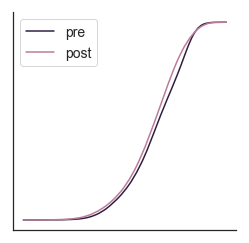

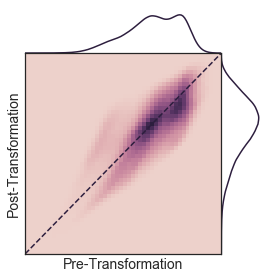

In [44]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [45]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina.uns['native_distance'], post=retina.uns['tsne_distance'])
knn = knn_preservation(pre=retina.uns['native_knn'], post=retina.uns['tsne_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA_t-SNE'], final_distance_stats['Retina']['EMD']['PCA_t-SNE'], final_distance_stats['Retina']['Knn Pres.']['PCA_t-SNE'] = mantel_stats[0], EMD, knn

R: 0.4603
EMD: 0.2627
Knn Pres.: 96.3668
CPU times: user 783 ms, sys: 74.1 ms, total: 858 ms
Wall time: 441 ms


CPU times: user 666 ms, sys: 42.7 ms, total: 709 ms
Wall time: 492 ms


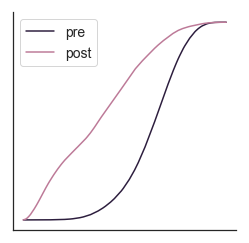

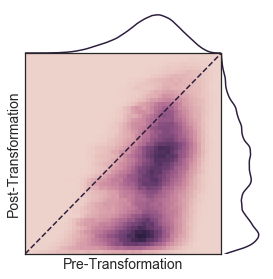

In [46]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [47]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_sel.uns['native_distance'], post=retina_sel.uns['tsne_distance'])
knn = knn_preservation(pre=retina_sel.uns['native_knn'], post=retina_sel.uns['tsne_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['t-SNE'], final_distance_stats['Retina']['EMD']['t-SNE'], final_distance_stats['Retina']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, knn

R: 0.7635
EMD: 0.2987
Knn Pres.: 96.8076
CPU times: user 785 ms, sys: 74.4 ms, total: 860 ms
Wall time: 442 ms


CPU times: user 671 ms, sys: 44.3 ms, total: 715 ms
Wall time: 498 ms


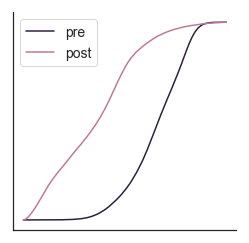

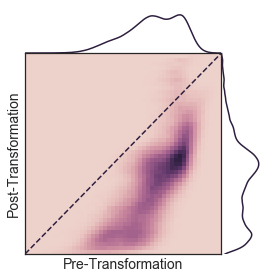

In [48]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [49]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina.uns['native_distance'], post=retina.uns['umap_distance'])
knn = knn_preservation(pre=retina.uns['native_knn'], post=retina.uns['umap_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['PCA_UMAP'], final_distance_stats['Retina']['EMD']['PCA_UMAP'], final_distance_stats['Retina']['Knn Pres.']['PCA_UMAP'] = mantel_stats[0], EMD, knn

R: 0.3574
EMD: 0.3062
Knn Pres.: 96.2651
CPU times: user 779 ms, sys: 75.4 ms, total: 855 ms
Wall time: 437 ms


CPU times: user 665 ms, sys: 36.8 ms, total: 702 ms
Wall time: 485 ms


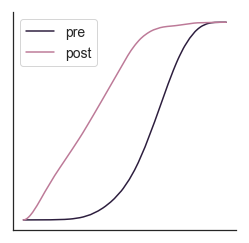

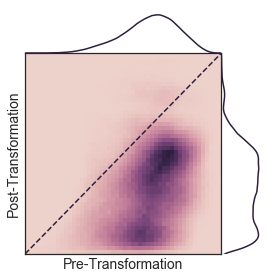

In [50]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [51]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=retina_sel.uns['native_distance'], post=retina_sel.uns['umap_distance'])
knn = knn_preservation(pre=retina_sel.uns['native_knn'], post=retina_sel.uns['umap_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Retina']['R']['UMAP'], final_distance_stats['Retina']['EMD']['UMAP'], final_distance_stats['Retina']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, knn

R: 0.7365
EMD: 0.2629
Knn Pres.: 96.6825
CPU times: user 784 ms, sys: 73.6 ms, total: 858 ms
Wall time: 441 ms


CPU times: user 677 ms, sys: 45.7 ms, total: 722 ms
Wall time: 506 ms


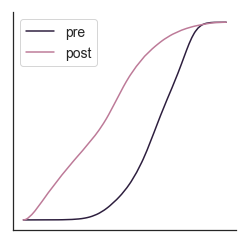

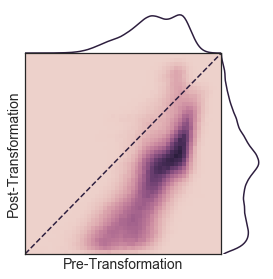

In [52]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

### Colon

In [53]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=colon_sel.uns['native_distance'], post=colon.uns['native_distance'])
knn = knn_preservation(pre=colon_sel.uns['native_knn'], post=colon.uns['native_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA'], final_distance_stats['Colon']['EMD']['PCA'], final_distance_stats['Colon']['Knn Pres.']['PCA'] = mantel_stats[0], EMD, knn

R: 0.904
EMD: 0.0326
Knn Pres.: 97.6719
CPU times: user 654 ms, sys: 75.9 ms, total: 730 ms
Wall time: 317 ms


CPU times: user 550 ms, sys: 35.4 ms, total: 586 ms
Wall time: 371 ms


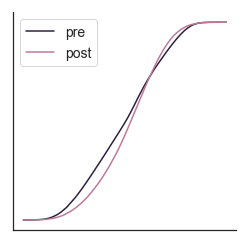

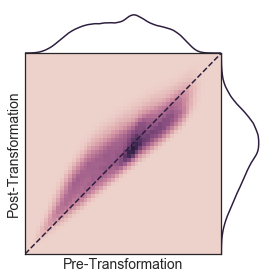

In [54]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [55]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=colon.uns['native_distance'], post=colon.uns['tsne_distance'])
knn = knn_preservation(pre=colon.uns['native_knn'], post=colon.uns['tsne_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA_t-SNE'], final_distance_stats['Colon']['EMD']['PCA_t-SNE'], final_distance_stats['Colon']['Knn Pres.']['PCA_t-SNE'] = mantel_stats[0], EMD, knn

R: 0.6828
EMD: 0.1086
Knn Pres.: 96.4238
CPU times: user 649 ms, sys: 78.2 ms, total: 728 ms
Wall time: 315 ms


CPU times: user 558 ms, sys: 35.2 ms, total: 594 ms
Wall time: 377 ms


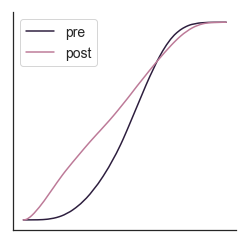

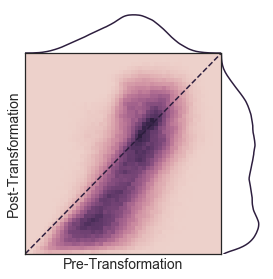

In [56]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [57]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=colon_sel.uns['native_distance'], post=colon_sel.uns['tsne_distance'])
knn = knn_preservation(pre=colon_sel.uns['native_knn'], post=colon_sel.uns['tsne_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['t-SNE'], final_distance_stats['Colon']['EMD']['t-SNE'], final_distance_stats['Colon']['Knn Pres.']['t-SNE'] = mantel_stats[0], EMD, knn

R: 0.8688
EMD: 0.0666
Knn Pres.: 97.1607
CPU times: user 657 ms, sys: 74.4 ms, total: 732 ms
Wall time: 316 ms


CPU times: user 559 ms, sys: 37.7 ms, total: 597 ms
Wall time: 381 ms


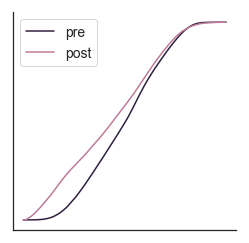

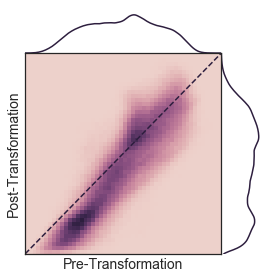

In [58]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [59]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=colon.uns['native_distance'], post=colon.uns['umap_distance'])
knn = knn_preservation(pre=colon.uns['native_knn'], post=colon.uns['umap_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['PCA_UMAP'], final_distance_stats['Colon']['EMD']['PCA_UMAP'], final_distance_stats['Colon']['Knn Pres.']['PCA_UMAP'] = mantel_stats[0], EMD, knn

R: 0.7144
EMD: 0.0993
Knn Pres.: 96.3174
CPU times: user 651 ms, sys: 79 ms, total: 730 ms
Wall time: 315 ms


CPU times: user 563 ms, sys: 37.8 ms, total: 600 ms
Wall time: 383 ms


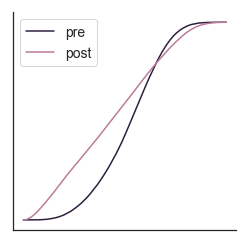

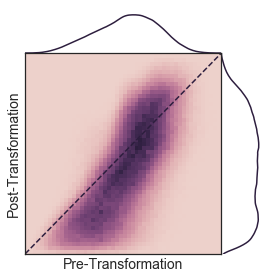

In [60]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

In [61]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=colon_sel.uns['native_distance'], post=colon_sel.uns['umap_distance'])
knn = knn_preservation(pre=colon_sel.uns['native_knn'], post=colon_sel.uns['umap_knn'])
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

# dump outputs into dictionary
final_distance_stats['Colon']['R']['UMAP'], final_distance_stats['Colon']['EMD']['UMAP'], final_distance_stats['Colon']['Knn Pres.']['UMAP'] = mantel_stats[0], EMD, knn

R: 0.8824
EMD: 0.0847
Knn Pres.: 97.1815
CPU times: user 667 ms, sys: 79.1 ms, total: 747 ms
Wall time: 320 ms


CPU times: user 557 ms, sys: 37.5 ms, total: 594 ms
Wall time: 378 ms


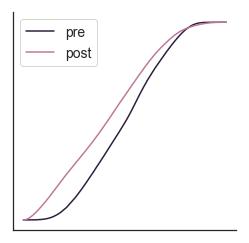

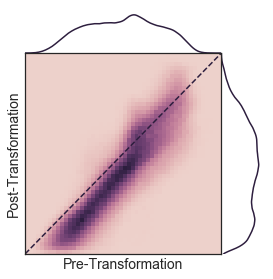

In [62]:
%%time
# output plots to file
plt.figure(figsize=(4,4))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_dist.png', transparent=True, bbox_inches='tight', dpi=1000)

joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)
#plt.savefig(fname='../images/retina_tSNE_corr.png', transparent=True, bbox_inches='tight', dpi=1000)

---
### Summary Metrics

In [63]:
retina_sum = pd.DataFrame(final_distance_stats['Retina'])
retina_sum = retina_sum.sort_values(by='R')
retina_sum = retina_sum.reindex(['EMD','R','Knn Pres.'], axis=1)
#retina_sum.to_csv('retina_global_metrics.csv')

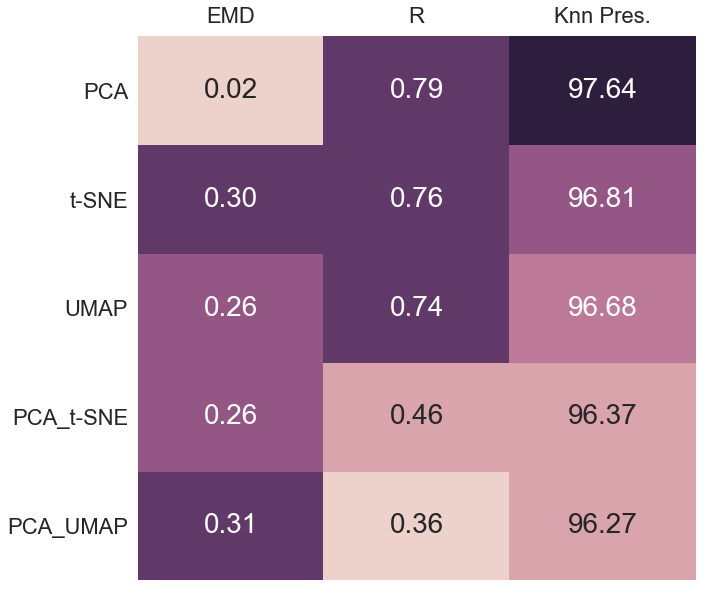

In [64]:
retina_norm=(retina_sum-retina_sum.mean())/retina_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
#plt.savefig(fname='../images/retina_global_metrics.png', transparent=True, bbox_inches='tight')

In [65]:
colon_sum = pd.DataFrame(final_distance_stats['Colon'])
colon_sum = colon_sum.sort_values(by='R')
colon_sum = colon_sum.reindex(['EMD','R','Knn Pres.'], axis=1)
#colon_sum.to_csv('colon_global_metrics.csv')

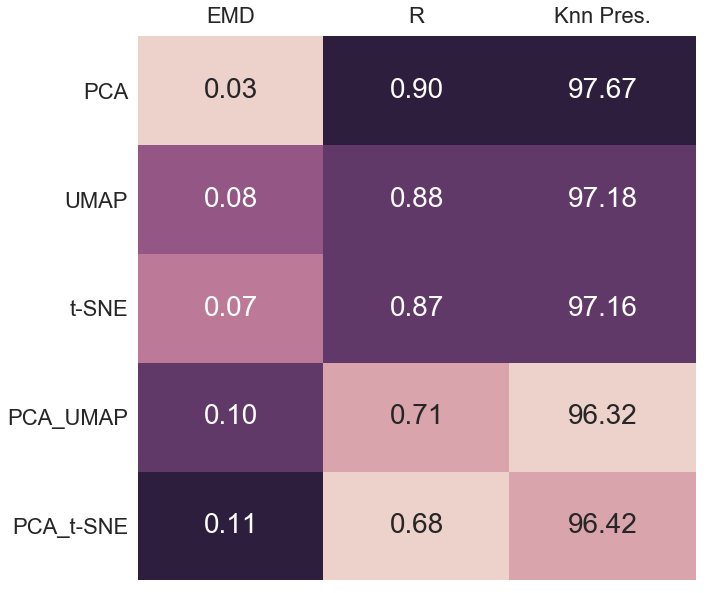

In [66]:
colon_norm=(colon_sum-colon_sum.mean())/colon_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
#plt.savefig(fname='../images/colon_global_metrics.png', transparent=True, bbox_inches='tight')